<a href="https://colab.research.google.com/github/keduog/LLM/blob/main/spirograph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Error in corpus analysis: 
**********************************************************************
  Resource punkt_tab not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt_tab')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load tokenizers/punkt_tab/english/

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

Corpus → Spiro Params: R=8.00, r=1.50, d=3.00
Flow Score: -0.00 (higher = smoother)

Text generation skipped due to error: 
**********************************************************************
  Resource punkt_tab not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt_tab

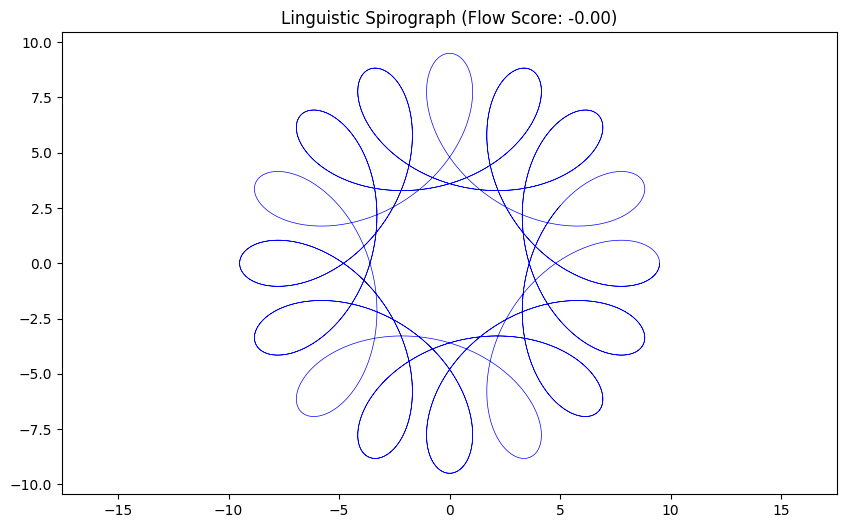

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

# ========================
# Initialize NLTK Data - More Robust Version
# ========================
def download_nltk_resources():
    try:
        nltk.data.find('tokenizers/punkt')
    except LookupError:
        print("Downloading punkt tokenizer...")
        nltk.download('punkt', quiet=True)

    try:
        nltk.data.find('corpora/stopwords')
    except LookupError:
        print("Downloading stopwords...")
        nltk.download('stopwords', quiet=True)

    # Some systems need this additional download
    try:
        nltk.data.find('tokenizers/punkt/PY3/english.pickle')
    except LookupError:
        print("Downloading punkt English data...")
        nltk.download('punkt_tab', quiet=True)

download_nltk_resources()

# ========================
# 1. Corpus Analysis
# ========================
def analyze_corpus(corpus_text):
    """Extract linguistic features and map to Spirograph parameters."""
    try:
        sentences = sent_tokenize(corpus_text)
        words = word_tokenize(corpus_text.lower())
        words = [w for w in words if w.isalpha() and w not in stopwords.words('english')]

        # Feature extraction with safety checks
        avg_sentence_len = np.mean([len(word_tokenize(sent)) for sent in sentences]) if sentences else 5.0
        lexical_diversity = len(set(words)) / len(words) if len(words) > 0 else 0.5
        word_freq = Counter(words)
        most_common_ratio = word_freq.most_common(1)[0][1] / len(words) if len(words) > 0 else 0.2

        # Map to Spirograph parameters with reasonable defaults
        R = max(avg_sentence_len, 3.0)  # Minimum context size
        r = 1.0 / (1.0 + max(lexical_diversity, 0.1))  # Prevent division by zero
        d = 2.0 + (1.0 - most_common_ratio) * 5  # Scale novelty

        return R, r, d
    except Exception as e:
        print(f"Error in corpus analysis: {e}")
        return 8.0, 1.5, 3.0  # Default fallback values

# ========================
# 2. Spirograph Generation
# ========================
def generate_spirograph(R, r, d, revolutions=10, points_per_rev=1000):
    """Generate Spirograph curve from parameters."""
    t = np.linspace(0, revolutions * 2 * np.pi, int(revolutions * points_per_rev))
    x = (R - r) * np.cos(t) + d * np.cos(((R - r) / r) * t)
    y = (R - r) * np.sin(t) - d * np.sin(((R - r) / r) * t)
    return x, y

# ========================
# 3. Flow Evaluation
# ========================
def evaluate_flow(x, y):
    """Quantify smoothness (lower acceleration = better flow)."""
    try:
        dx = np.gradient(x)
        dy = np.gradient(y)
        ddx = np.gradient(dx)
        ddy = np.gradient(dy)
        acceleration = np.sqrt(ddx**2 + ddy**2)
        return -np.mean(acceleration)
    except:
        return 0.0  # Neutral score if calculation fails

# ========================
# 4. Text Generation (Optional)
# ========================
def spiro_to_text(x, y, vocabulary):
    """Map Spirograph points to words from a vocabulary."""
    if not vocabulary:
        return "[No vocabulary available]"

    text = []
    vocab_size = len(vocabulary)
    for xi, yi in zip(x[::100], y[::100]):  # Skip points for brevity
        angle = np.arctan2(yi, xi) % (2 * np.pi)
        word_idx = int((angle / (2 * np.pi)) * vocab_size)
        text.append(vocabulary[word_idx % vocab_size])
    return " ".join(text[:20])  # Return shorter snippet

# ========================
# Main Execution
# ========================
if __name__ == "__main__":
    # Example corpus (replace with your text)
    corpus_text = """
    Love is not love which alters when it alteration finds.
    O no! It is an ever-fixed mark that looks on tempests and is never shaken.
    It is the star to every wandering bark, whose worth's unknown, although his height be taken.
    """

    # Step 1: Analyze corpus and get parameters
    R, r, d = analyze_corpus(corpus_text)
    print(f"Corpus → Spiro Params: R={R:.2f}, r={r:.2f}, d={d:.2f}")

    # Step 2: Generate Spirograph
    x, y = generate_spirograph(R, r, d, revolutions=5)

    # Step 3: Evaluate flow
    flow_score = evaluate_flow(x, y)
    print(f"Flow Score: {flow_score:.2f} (higher = smoother)")

    # Step 4: Generate text (optional)
    try:
        vocabulary = sorted(set([w.lower() for w in word_tokenize(corpus_text)
                               if w.isalpha() and w not in stopwords.words('english')]))
        generated_text = spiro_to_text(x, y, vocabulary)
        print("\nGenerated Text Snippet:")
        print(generated_text + "...")
    except Exception as e:
        print(f"\nText generation skipped due to error: {e}")

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, linewidth=0.5, color='blue')
    plt.title(f"Linguistic Spirograph (Flow Score: {flow_score:.2f})")
    plt.axis('equal')
    plt.show()